In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stu = pd.read_excel("student_marks_forseaborn.xlsx")
stu.head()
stu.isnull().sum()

StudentID       0
Name            0
Class           0
Gender          0
Maths           0
Science         0
English         0
History         0
Computer        0
TotalMarks      0
AverageMarks    0
Result          0
dtype: int64

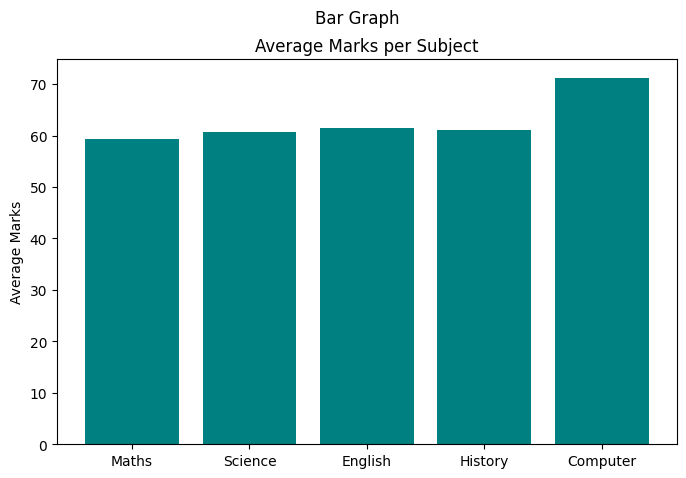

In [81]:
subjects = ["Maths", "Science", "English", "History", "Computer"]
subject_avg = stu[subjects].mean()

plt.figure(figsize=(8,5))
plt.bar(subject_avg.index, subject_avg.values, color="teal")
plt.suptitle("Bar Graph")
plt.title("Average Marks per Subject")
plt.ylabel("Average Marks")
plt.show()

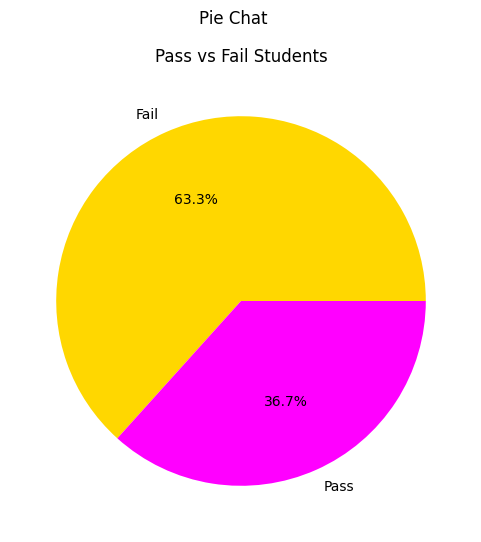

In [82]:
plt.figure(figsize=(6,6))
stu["Result"].value_counts().plot.pie(autopct="%1.1f%%", colors=["gold","magenta"])
plt.suptitle("Pie Chat")
plt.title("Pass vs Fail Students")
plt.ylabel("")
plt.show()

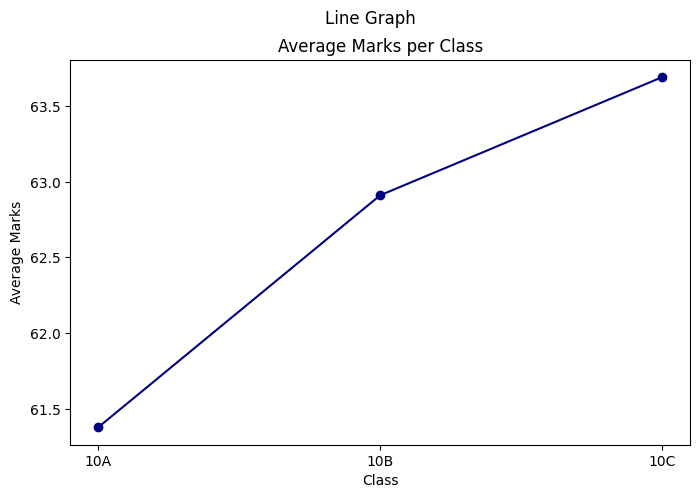

In [83]:
class_avg = stu.groupby("Class")["AverageMarks"].mean()

plt.figure(figsize=(8,5))
plt.plot(class_avg.index, class_avg.values, marker="o", linestyle="-", color="navy")
plt.suptitle("Line Graph")
plt.title("Average Marks per Class")
plt.xlabel("Class")
plt.ylabel("Average Marks")
plt.show()

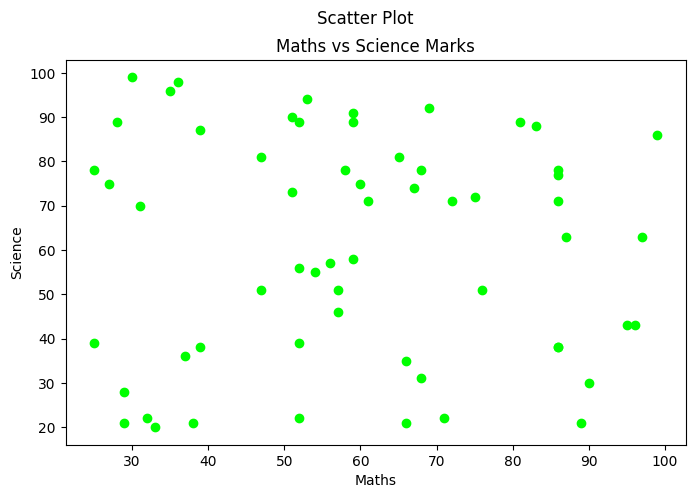

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(stu["Maths"], stu["Science"], color="lime")
plt.suptitle("Scatter Plot")
plt.title("Maths vs Science Marks")
plt.xlabel("Maths")
plt.ylabel("Science")
plt.show()

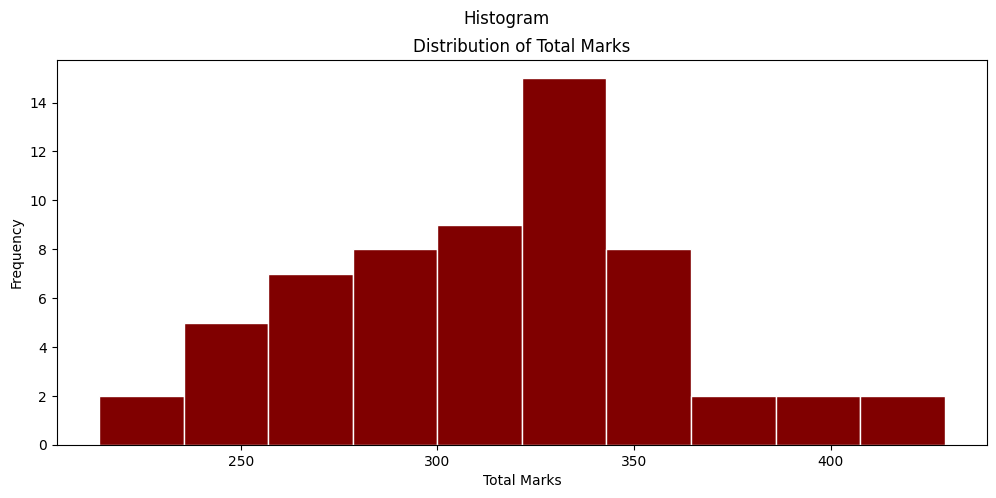

In [59]:
plt.figure(figsize=(12,5))
plt.hist(stu["TotalMarks"], bins=10, color="maroon", edgecolor="white")
plt.suptitle("Histogram")
plt.title("Distribution of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Frequency")
plt.show()

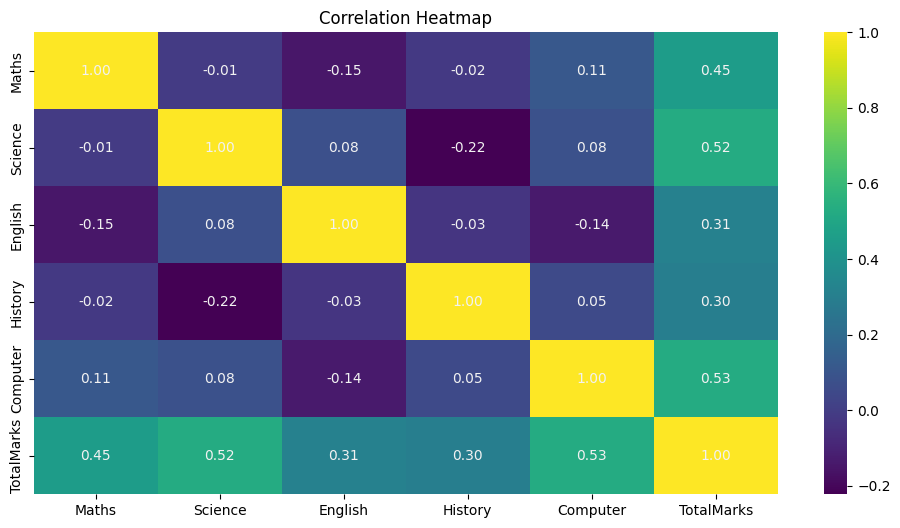

In [108]:
plt.figure(figsize=(12,6))
sns.heatmap(stu[subjects + ["TotalMarks"]].corr(), annot=True, cmap="viridis", fmt=".2f", annot_kws={"size":10, "color":"#f2f2f2"})
plt.title("Correlation Heatmap")
plt.show()

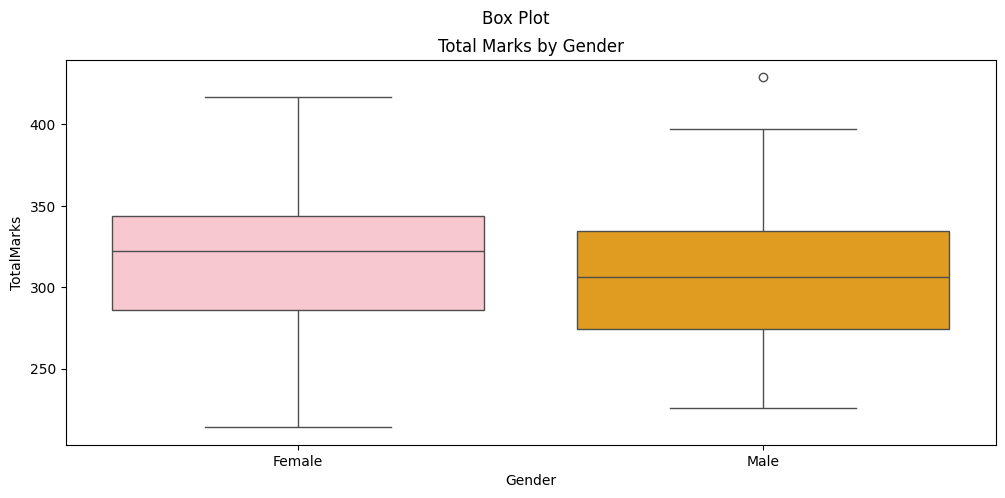

In [88]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Gender", y="TotalMarks", data=stu, hue="Gender", palette={"Male": "orange", "Female": "pink"})
plt.suptitle("Box Plot")
plt.title("Total Marks by Gender")
plt.show()

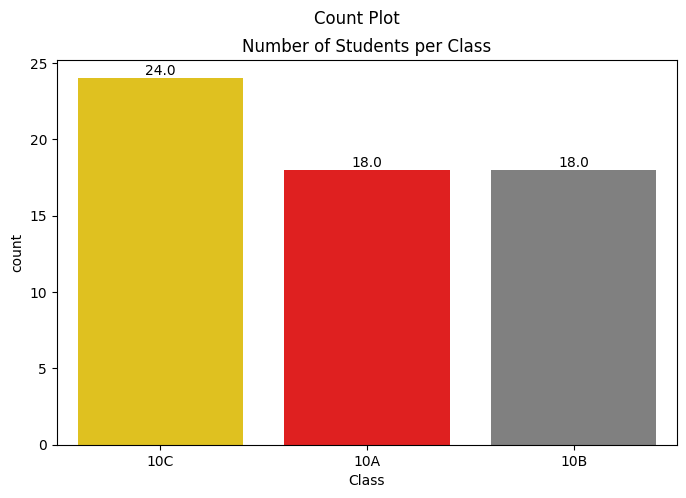

In [84]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Class", data=stu, hue="Class", palette={"10A": "red", "10B": "gray", "10C": "gold"})
plt.suptitle("Count Plot")
plt.title("Number of Students per Class")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

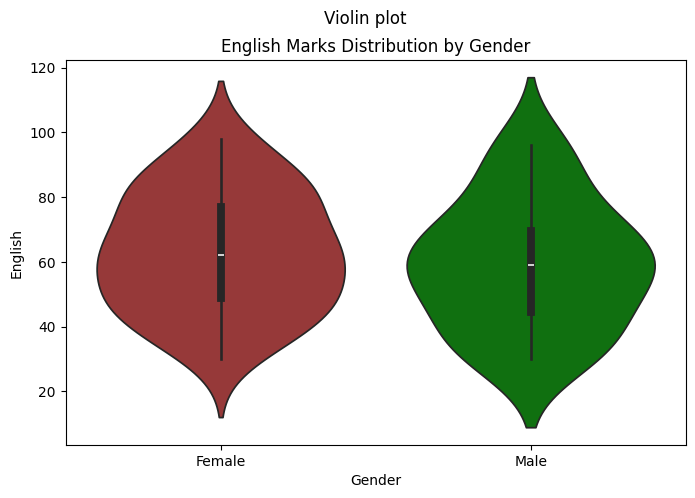

In [85]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Gender", y="English", data=stu, hue="Gender", palette={"Male": "green", "Female": "brown"})
plt.suptitle("Violin plot")
plt.title("English Marks Distribution by Gender")
plt.show()

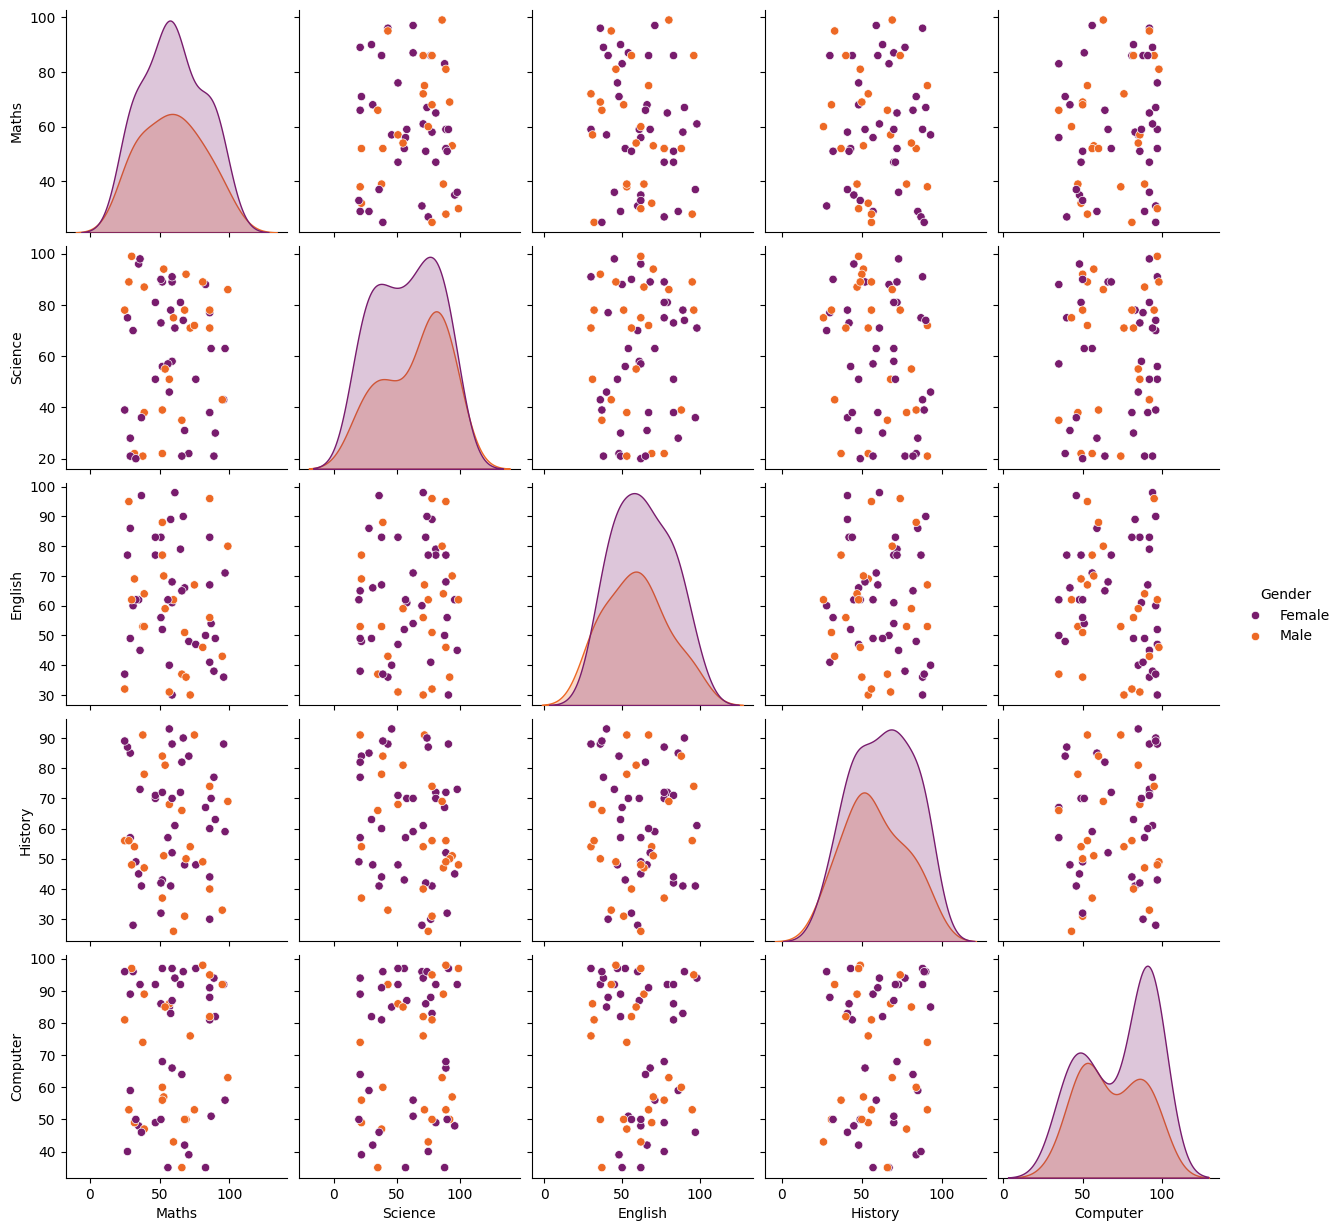

In [87]:
sns.pairplot(stu, vars=subjects, hue="Gender", palette="inferno")
plt.show()

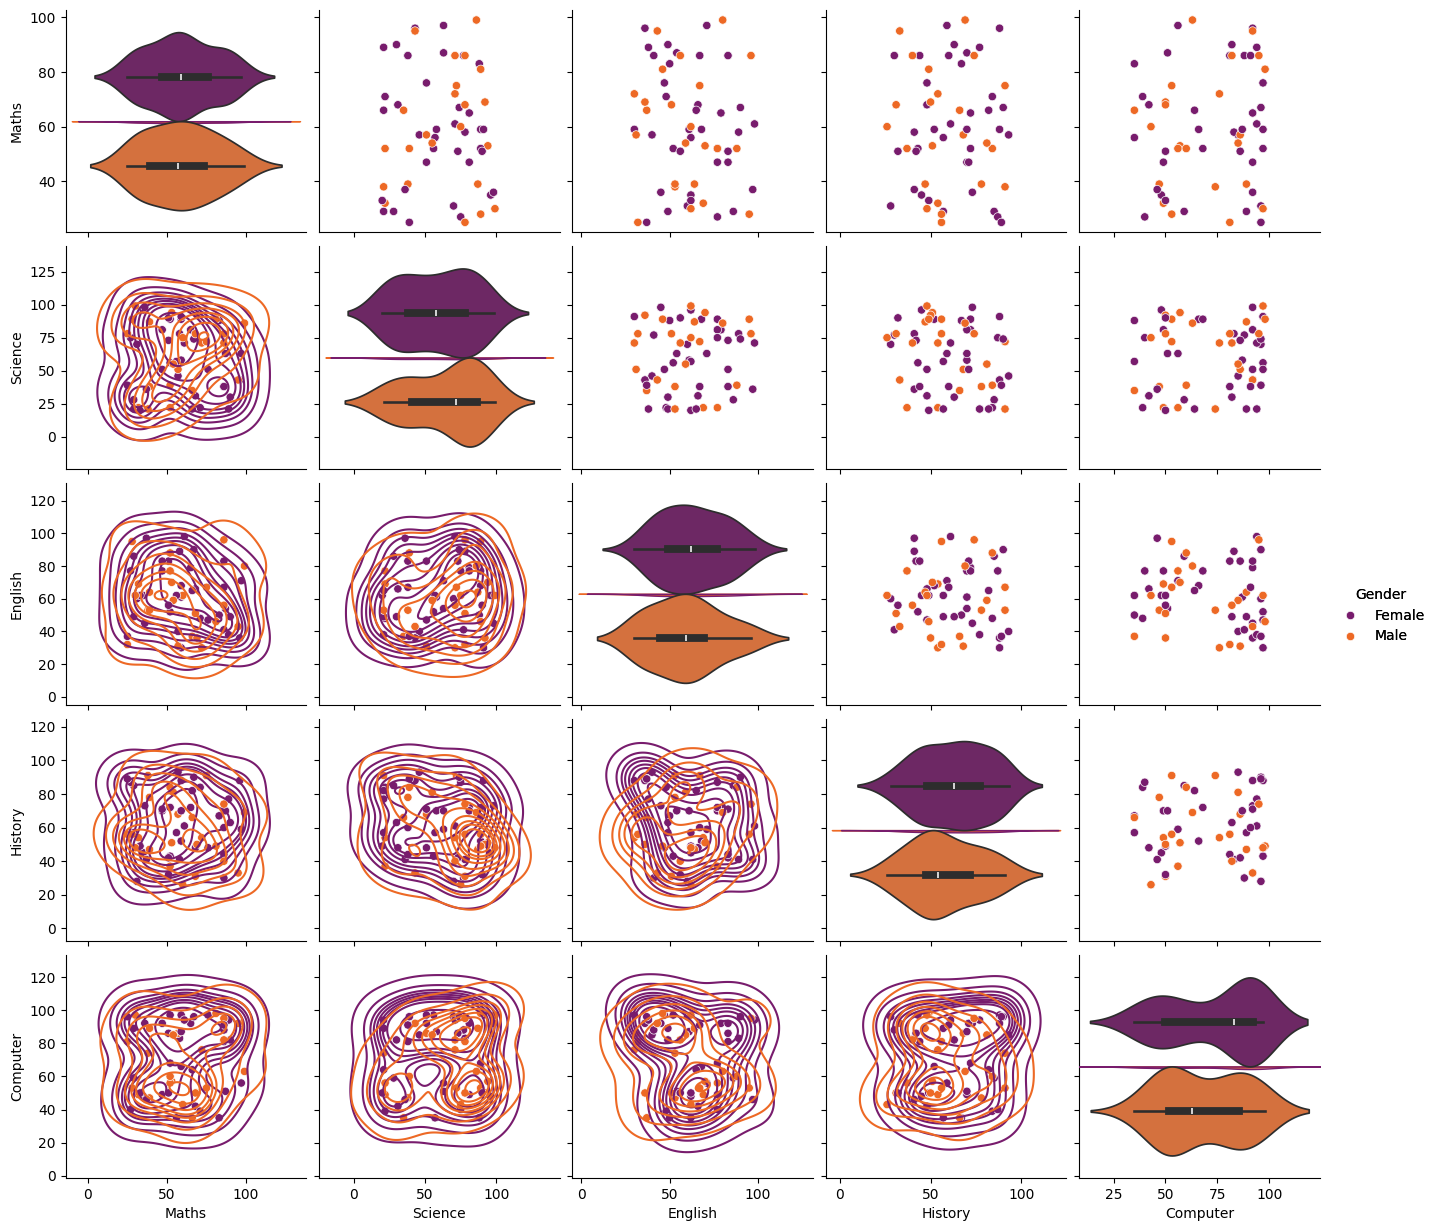

In [101]:
g = sns.pairplot(stu, vars=subjects, hue="Gender", palette="inferno")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.violinplot)  
g.add_legend()

In [31]:
corr_matrix = stu[subjects + ["TotalMarks"]].corr()
strongest_corr = corr_matrix["TotalMarks"].drop("TotalMarks").idxmax()
print(" Subject with strongest correlation with TotalMarks:", strongest_corr)

 Subject with strongest correlation with TotalMarks: Computer


In [36]:
english_avg = stu.groupby("Gender")["English"].mean()
print("Average English marks by Gender:\n",english_avg)
better_english = english_avg.idxmax()
print("\n Better performance in English:", better_english)

Average English marks by Gender:
 Gender
Female    63.108108
Male      59.000000
Name: English, dtype: float64

 Better performance in English: Female


In [38]:
class_avg = stu.groupby("Class")["AverageMarks"].mean()
best_class = class_avg.idxmax()
print("Class with highest average marks:", best_class)

Class with highest average marks: 10C
